<a href="https://colab.research.google.com/github/jamogh/Taxi_Fare_Prediction/blob/main/Taxi_Fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/TaxiFare (2) (1).csv")
print(df)

      unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0       26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1       52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2       35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3       30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4       51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   
...         ...     ...                      ...                  ...   
49995   25:15.0    15.0  2013-06-12 23:25:15 UTC           -73.999973   
49996   19:18.0     7.5  2015-06-22 17:19:18 UTC           -73.984756   
49997   53:00.0     6.9  2011-01-30 04:53:00 UTC           -74.002698   
49998   09:00.0     4.5  2012-11-06 07:09:00 UTC           -73.946062   
49999   13:14.0    10.9  2010-01-13 08:13:14 UTC           -73.932603   

       latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0               40.721319            -73.841610    

In [28]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [30]:
df=pd.read_csv("/content/drive/MyDrive/TaxiFare (2) (1).csv")

In [31]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [32]:
df.shape

(50000, 8)

In [33]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [35]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

<Axes: xlabel='no_of_passenger', ylabel='count'>

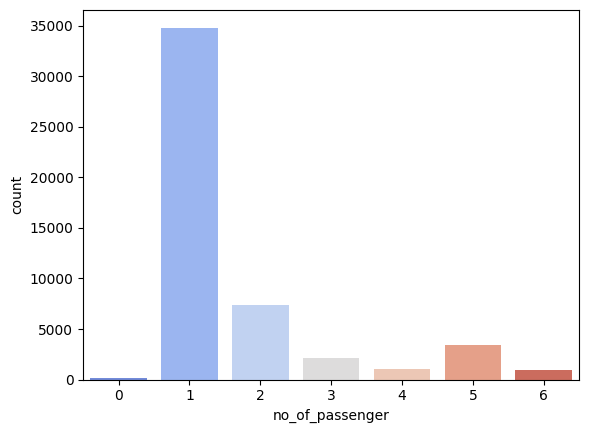

In [36]:
sns.countplot(x="no_of_passenger",data=df,palette="coolwarm")

In [37]:
df["no_of_passenger"].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

<Axes: xlabel='no_of_passenger', ylabel='count'>

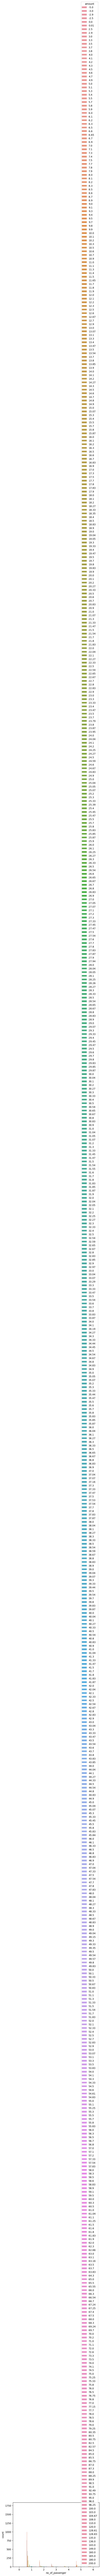

In [38]:
sns.countplot(x="no_of_passenger",hue="amount",data=df)

In [39]:
pd.crosstab(df["no_of_passenger"],df["amount"])

amount,-5.00,-3.00,-2.90,-2.50,0.00,0.01,2.50,2.90,3.00,3.30,...,128.61,128.83,135.00,136.00,143.00,149.00,160.00,165.00,180.00,200.00
no_of_passenger,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,1,5,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,3,3,1,169,87,68,264,...,0,1,1,1,1,0,1,2,1,1
2,0,0,0,0,0,0,15,20,7,55,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,4,4,0,22,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,1,11,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,12,6,7,24,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='no_of_passenger', ylabel='amount'>

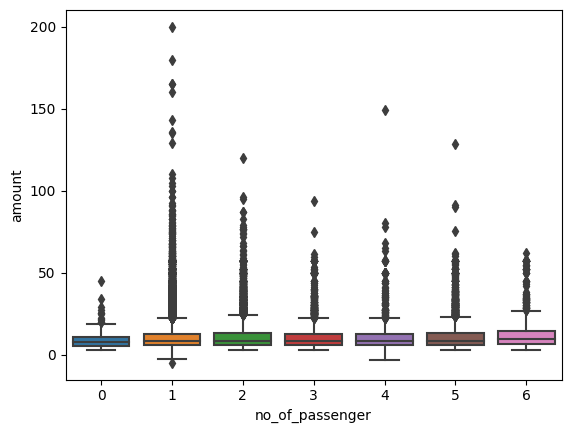

In [40]:
sns.boxplot(x="no_of_passenger",y="amount",data=df)

In [41]:
df=df.drop("date_time_of_pickup",axis=1)

In [42]:
df.head()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [45]:
df=df.dropna()

In [46]:
df.shape

(50000, 7)

In [47]:
df.head()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [48]:
df=pd.get_dummies(columns=["no_of_passenger"],data=df)

In [49]:
df.head()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger_0,no_of_passenger_1,no_of_passenger_2,no_of_passenger_3,no_of_passenger_4,no_of_passenger_5,no_of_passenger_6
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,0,1,0,0,0,0,0
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,0,1,0,0,0,0,0
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,0,0,1,0,0,0,0
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,0,1,0,0,0,0,0
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,0,1,0,0,0,0,0


In [50]:
df=df.drop(["unique_id"],axis=1)

In [51]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger_0,no_of_passenger_1,no_of_passenger_2,no_of_passenger_3,no_of_passenger_4,no_of_passenger_5,no_of_passenger_6
0,4.5,-73.844311,40.721319,-73.841610,40.712278,0,1,0,0,0,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,0,1,0,0,0,0,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,0,0,1,0,0,0,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,0,1,0,0,0,0,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,0,1,0,0,0,0,0


In [61]:
X=df.drop("amount",axis=1)
Y=df["amount"]

In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [66]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

In [67]:
model_3=DecisionTreeRegressor()

In [68]:
model_3.fit(X_train,y_train)

DecisionTreeRegressor()

In [69]:
model_3.score(X_train,y_train)

0.9763906952071122

In [70]:
model_3.score(X_test,y_test)

0.5392109700372196

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
model_5=GradientBoostingRegressor()

In [75]:
model_5.fit(X_train,y_train)

GradientBoostingRegressor()

In [76]:
model_5.score(X_train,y_train)

0.7441540128412297

In [77]:
model_5.score(X_test,y_test)

0.6916321670727961